In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
 
from sklearn.metrics import confusion_matrix
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'sklearn'

#属性信息：

    属性列表：
    id :id
 
 

# 1 - 数据选择

将数据正确转换为可加载到分析软件中的格式。

In [1]:
df = pd.read_csv("ecom-user-churn-data.csv",  ) 
 

NameError: name 'pd' is not defined

In [3]:
df.columns

Index(['visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv',
       'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n',
       'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg',
       'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd',
       'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran',
       'int_cat1_n', 'int_cat2_n', 'int_cat3_n', 'int_cat4_n', 'int_cat5_n',
       'int_cat6_n', 'int_cat7_n', 'int_cat8_n', 'int_cat9_n', 'int_cat10_n',
       'int_cat11_n', 'int_cat12_n', 'int_cat13_n', 'int_cat15_n',
       'int_cat16_n', 'int_cat17_n', 'int_cat18_n', 'int_cat19_n',
       'int_cat20_n', 'int_cat21_n', 'int_cat22_n', 'int_cat23_n',
       'int_cat24_n', 'target_class'],
      dtype='object')

In [4]:
df.head()

visitorid  ses_rec  ses_rec_avg  ses_rec_sd  ses_rec_cv  user_rec  ses_n  \
0         89     23.0         16.0         0.0         0.0      39.0    2.0   
1        251     23.0         61.0         0.0         0.0      85.0    2.0   
2        270     14.0          0.1         0.3         3.0      21.0   11.0   
3        298     11.0         13.0         0.0         0.0      24.0    2.0   
4        474     16.0         26.0         0.0         0.0      43.0    2.0   

    ses_n_r  int_n   int_n_r  ...  int_cat16_n  int_cat17_n  int_cat18_n  \
0  0.051282    3.0  1.500000  ...            0            0            0   
1  0.023529    2.0  1.000000  ...            0            0            0   
2  0.523810   13.0  1.181818  ...            0            0            0   
3  0.083333    4.0  2.000000  ...            0            0            0   
4  0.046512    2.0  1.000000  ...            2            0            0   

   int_cat19_n  int_cat20_n  int_cat21_n  int_cat22_n  int_cat23_n  \
0            0            3            0            0            0   
1            0            0            0            1            0   
2            0            0            0           13            0   
3            3            1            0            0            0   
4            0            0            0            0            0   

   int_cat24_n  target_class  
0            0             1  
1            0             1  
2            0             1  
3            0             1  
4            0             1  

[5 rows x 49 columns]

# 2 - 背景信息
i.数据集的描述， 包括数据集的内容 ，包括从何处以及如何收集数据集，以及出于何种目的
项目描述及其对组织的重要性。

# 3 - 数据描述、数据可视化
i.数据集的一般详细信息
五个属性的详细说明

In [5]:
data = df.copy()

In [6]:
# 数据数字类型描述
df.describe() 

visitorid       ses_rec   ses_rec_avg    ses_rec_sd    ses_rec_cv  \
count  4.935800e+04  49358.000000  49358.000000  49358.000000  49358.000000   
mean   7.072986e+05     15.454840     11.231611      2.711961     -0.020100   
std    4.072098e+05      9.184645     18.162743      6.583917      0.917701   
min    3.700000e+01      0.000000      0.000000      0.000000     -1.000000   
25%    3.532920e+05      7.000000      0.000000      0.000000     -1.000000   
50%    7.100910e+05     16.000000      2.250000      0.000000      0.000000   
75%    1.060355e+06     23.000000     14.250000      1.000000      0.638646   
max    1.407573e+06     31.000000     99.000000     47.500000     11.525121   

           user_rec         ses_n       ses_n_r         int_n       int_n_r  \
count  49358.000000  49358.000000  49358.000000  49358.000000  49358.000000   
mean      33.822947      3.366445      0.172372      6.716277      1.720975   
std       25.237703      7.380573      0.372614     38.528882      1.455885   
min        0.000000      2.000000     -1.000000      2.000000      1.000000   
25%       16.000000      2.000000      0.060606      2.000000      1.000000   
50%       26.000000      2.000000      0.090909      3.000000      1.250000   
75%       46.000000      3.000000      0.166667      6.000000      2.000000   
max       99.000000    475.000000     18.000000   5549.000000     59.000000   

       ...   int_cat16_n   int_cat17_n   int_cat18_n   int_cat19_n  \
count  ...  49358.000000  49358.000000  49358.000000  49358.000000   
mean   ...      0.955792      0.773714      0.382977      0.732424   
std    ...      6.086722      5.003517      4.569604      4.977989   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...    576.000000    445.000000    481.000000    564.000000   

        int_cat20_n   int_cat21_n   int_cat22_n   int_cat23_n   int_cat24_n  \
count  49358.000000  49358.000000  49358.000000  49358.000000  49358.000000   
mean       0.503343      0.447020      2.102577      0.038130      0.099579   
std        3.259194      3.873684     16.273213      0.593681      1.135149   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      2.000000      0.000000      0.000000   
max      317.000000    420.000000   2282.000000     54.000000    105.000000   

       target_class  
count  49358.000000  
mean       0.885591  
std        0.318311  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 49 columns]

In [7]:
# 数据列描述
df.info(verbose=1) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitorid      49358 non-null  int64  
 1   ses_rec        49358 non-null  float64
 2   ses_rec_avg    49358 non-null  float64
 3   ses_rec_sd     49358 non-null  float64
 4   ses_rec_cv     49358 non-null  float64
 5   user_rec       49358 non-null  float64
 6   ses_n          49358 non-null  float64
 7   ses_n_r        49358 non-null  float64
 8   int_n          49358 non-null  float64
 9   int_n_r        49358 non-null  float64
 10  tran_n         49358 non-null  float64
 11  tran_n_r       49358 non-null  float64
 12  rev_sum        49358 non-null  float64
 13  rev_sum_r      49358 non-null  float64
 14  major_spend_r  49358 non-null  float64
 15  int_cat_n_avg  49358 non-null  float64
 16  int_itm_n_avg  49358 non-null  float64
 17  ses_mo_avg     49358 non-null  float64
 18  ses_mo

In [8]:
# 
df[["visitorid"]].describe([0.5,0.75 ,0.99]) 

visitorid
count  4.935800e+04
mean   7.072986e+05
std    4.072098e+05
min    3.700000e+01
50%    7.100910e+05
75%    1.060355e+06
99%    1.393224e+06
max    1.407573e+06

In [9]:
df[["ses_rec"]]\
.describe([0.5,0.75 ,0.99]) 

ses_rec
count  49358.000000
mean      15.454840
std        9.184645
min        0.000000
50%       16.000000
75%       23.000000
99%       31.000000
max       31.000000

In [10]:
df[["ses_rec_avg"]]\
.describe([0.5,0.75 ,0.99]) 


ses_rec_avg
count  49358.000000
mean      11.231611
std       18.162743
min        0.000000
50%        2.250000
75%       14.250000
99%       79.000000
max       99.000000

In [11]:
data["user_rec"].value_counts(normalize = True,dropna=False)*100

22.0    3.958831
23.0    3.658981
28.0    2.862758
27.0    2.801977
21.0    2.797925
          ...   
79.0    0.326188
58.0    0.303902
66.0    0.283642
65.0    0.257304
86.0    0.249200
Name: user_rec, Length: 100, dtype: float64

In [12]:
data["ses_n"].value_counts(normalize = True,dropna=False)*100

2.0      62.923943
3.0      17.847158
4.0       7.552980
5.0       3.768386
6.0       2.107055
           ...    
111.0     0.002026
241.0     0.002026
165.0     0.002026
384.0     0.002026
197.0     0.002026
Name: ses_n, Length: 125, dtype: float64

In [13]:
data["int_n"].value_counts(normalize = True,dropna=False)*100

2.0       36.032659
3.0       19.518619
4.0       11.422667
5.0        7.640099
6.0        5.087321
            ...    
128.0      0.002026
280.0      0.002026
162.0      0.002026
512.0      0.002026
1644.0     0.002026
Name: int_n, Length: 235, dtype: float64

In [14]:
data["tran_n"].value_counts(normalize = True,dropna=False)*100

0.0      95.970258
1.0       2.739171
2.0       0.688845
3.0       0.220836
4.0       0.111431
5.0       0.050650
6.0       0.046598
10.0      0.024312
7.0       0.022286
8.0       0.020260
9.0       0.012156
12.0      0.010130
16.0      0.008104
14.0      0.008104
17.0      0.006078
11.0      0.006078
21.0      0.004052
25.0      0.004052
22.0      0.004052
92.0      0.004052
206.0     0.002026
90.0      0.002026
42.0      0.002026
61.0      0.002026
141.0     0.002026
13.0      0.002026
45.0      0.002026
20.0      0.002026
150.0     0.002026
18.0      0.002026
23.0      0.002026
40.0      0.002026
96.0      0.002026
31.0      0.002026
83.0      0.002026
58.0      0.002026
461.0     0.002026
24.0      0.002026
132.0     0.002026
Name: tran_n, dtype: float64

In [15]:
# 查看所有列
df.columns

Index(['visitorid', 'ses_rec', 'ses_rec_avg', 'ses_rec_sd', 'ses_rec_cv',
       'user_rec', 'ses_n', 'ses_n_r', 'int_n', 'int_n_r', 'tran_n',
       'tran_n_r', 'rev_sum', 'rev_sum_r', 'major_spend_r', 'int_cat_n_avg',
       'int_itm_n_avg', 'ses_mo_avg', 'ses_mo_sd', 'ses_ho_avg', 'ses_ho_sd',
       'ses_wknd_r', 'ses_len_avg', 'time_to_int', 'time_to_tran',
       'int_cat1_n', 'int_cat2_n', 'int_cat3_n', 'int_cat4_n', 'int_cat5_n',
       'int_cat6_n', 'int_cat7_n', 'int_cat8_n', 'int_cat9_n', 'int_cat10_n',
       'int_cat11_n', 'int_cat12_n', 'int_cat13_n', 'int_cat15_n',
       'int_cat16_n', 'int_cat17_n', 'int_cat18_n', 'int_cat19_n',
       'int_cat20_n', 'int_cat21_n', 'int_cat22_n', 'int_cat23_n',
       'int_cat24_n', 'target_class'],
      dtype='object')

In [16]:

df.groupby(["int_cat24_n"]).count()[["visitorid"]]

visitorid
int_cat24_n           
0                47943
1                  528
2                  363
3                  171
4                  103
5                   68
6                   38
7                   20
8                   20
9                   12
10                  16
11                  10
12                   6
13                  12
14                   9
15                   3
16                   2
17                   5
18                   1
19                   3
20                   1
21                   1
23                   1
24                   4
25                   1
28                   1
29                   3
30                   1
31                   1
33                   1
34                   2
35                   1
36                   1
38                   1
39                   1
47                   1
60                   1
77                   1
105                  1

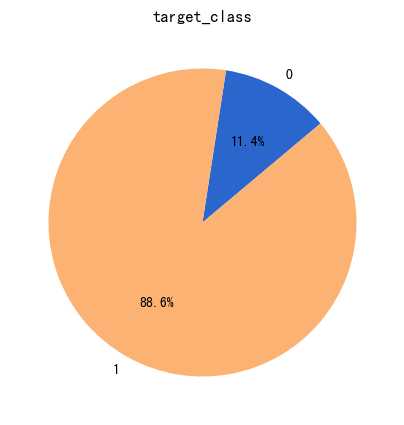

In [17]:
plt.figure(figsize=(5,5)) 
plt.pie(df.groupby(["target_class"]).count()[["visitorid"]]["visitorid"].to_list(),labels=df.groupby(["target_class"]).count()[["visitorid"]].index.to_list(),autopct='%1.1f%%',shadow=False,startangle=40,radius= 1,colors=["#2a66cc","#fbb272"])
plt.title("target_class")
plt.show() 

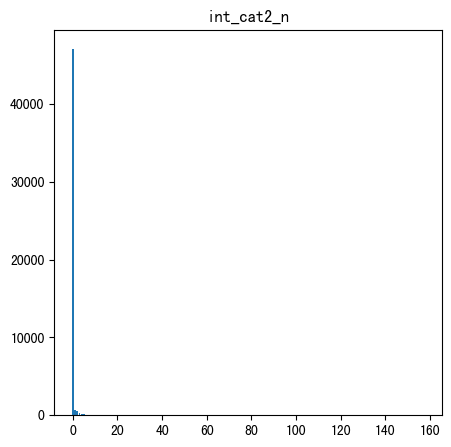

In [18]:
plt.figure(figsize=(5,5)) 
plt.bar(df.groupby(["int_cat2_n"]).count()[["visitorid"]].index.to_list()
        ,df.groupby(["int_cat2_n"]).count()[["visitorid"]]["visitorid"].to_list(), )
plt.title("int_cat2_n")
plt.show() 

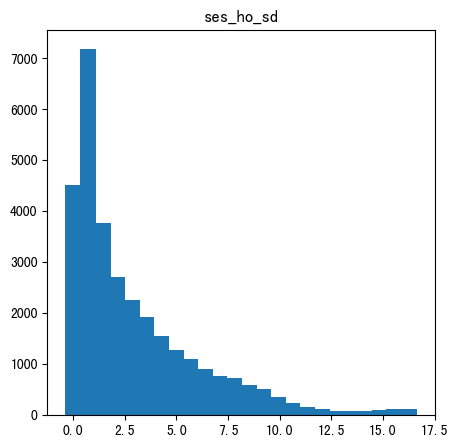

In [19]:
plt.figure(figsize=(5,5)) 
plt.bar(df.groupby(["ses_ho_sd"]).count()[["visitorid"]].index.to_list()
        ,df.groupby(["ses_ho_sd"]).count()[["visitorid"]]["visitorid"].to_list(), )
plt.title("ses_ho_sd")
plt.show() 

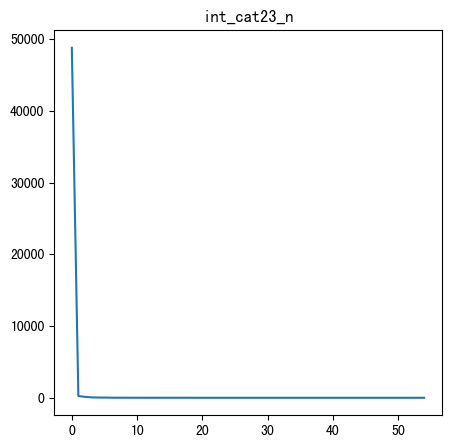

In [20]:
plt.figure(figsize=(5,5)) 
plt.plot(df.groupby(["int_cat23_n"]).count()[["visitorid"]].index.to_list()
        ,df.groupby(["int_cat23_n"]).count()[["visitorid"]]["visitorid"].to_list(), )
plt.title("int_cat23_n")
plt.show() 

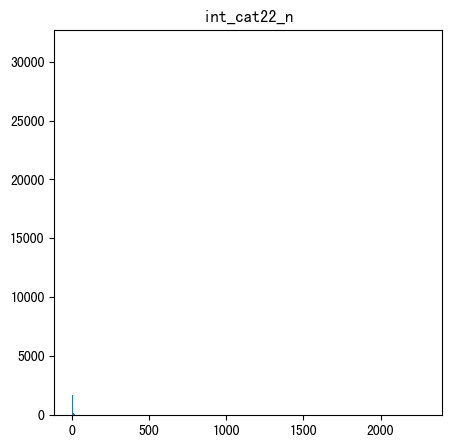

In [21]:
plt.figure(figsize=(5,5)) 
plt.bar(df.groupby(["int_cat22_n"]).count()[["visitorid"]].index.to_list()
        ,df.groupby(["int_cat22_n"]).count()[["visitorid"]]["visitorid"].to_list(), )
plt.title("int_cat22_n")
plt.show() 

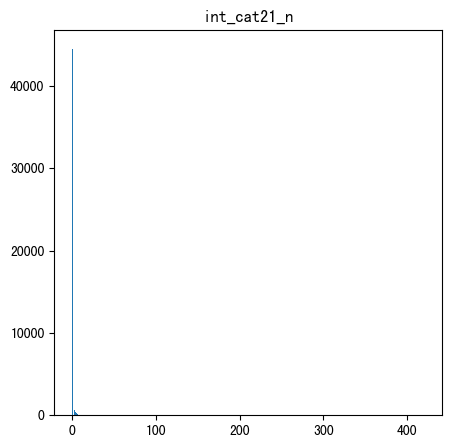

In [22]:
plt.figure(figsize=(5,5)) 
plt.bar(df.groupby(["int_cat21_n"]).count()[["visitorid"]].index.to_list()
        ,df.groupby(["int_cat21_n"]).count()[["visitorid"]]["visitorid"].to_list(), )
plt.title("int_cat21_n")
plt.show() 

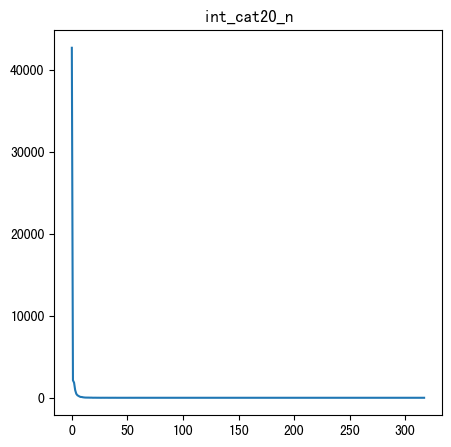

In [23]:
plt.figure(figsize=(5,5)) 
plt.plot(df.groupby(["int_cat20_n"]).count()[["visitorid"]].index.to_list()
        ,df.groupby(["int_cat20_n"]).count()[["visitorid"]]["visitorid"].to_list(), )
plt.title("int_cat20_n")
plt.show() 

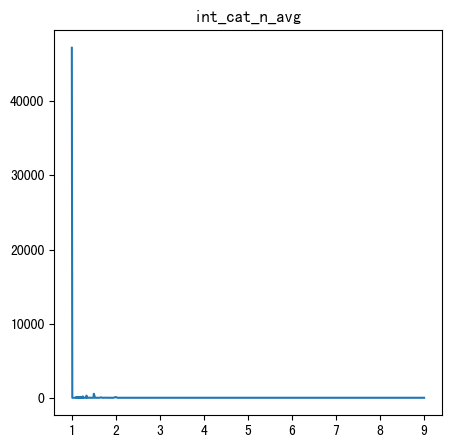

In [24]:
plt.figure(figsize=(5,5)) 
plt.plot(df.groupby(["int_cat_n_avg"]).count()[["visitorid"]].index.to_list()
        ,df.groupby(["int_cat_n_avg"]).count()[["visitorid"]]["visitorid"].to_list(), )
plt.title("int_cat_n_avg")
plt.show() 

# 4 - 数据 预处理
实现预处理和数据转换技术。
数据处理、数据清洗、检查异常值等

In [25]:
# 设置展示最大行列
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [26]:
# 查空值百分比
round(100*data.isnull().sum()/len(data),2).sort_values(ascending = False)

visitorid       0.0
int_cat1_n      0.0
int_cat3_n      0.0
int_cat4_n      0.0
int_cat5_n      0.0
               ... 
ses_ho_avg      0.0
ses_ho_sd       0.0
ses_wknd_r      0.0
ses_len_avg     0.0
target_class    0.0
Length: 49, dtype: float64

In [27]:
# 清除重复行
data = data.drop_duplicates()
 

In [28]:
# 空数据统计
data.isnull().sum()

visitorid       0
ses_rec         0
ses_rec_avg     0
ses_rec_sd      0
ses_rec_cv      0
               ..
int_cat21_n     0
int_cat22_n     0
int_cat23_n     0
int_cat24_n     0
target_class    0
Length: 49, dtype: int64

In [29]:
# data = data.fillna('其他')
 

In [30]:
data.shape

(49358, 49)

In [31]:
# 看列是否有空值
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49358 entries, 0 to 49357
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   visitorid      49358 non-null  int64  
 1   ses_rec        49358 non-null  float64
 2   ses_rec_avg    49358 non-null  float64
 3   ses_rec_sd     49358 non-null  float64
 4   ses_rec_cv     49358 non-null  float64
 5   user_rec       49358 non-null  float64
 6   ses_n          49358 non-null  float64
 7   ses_n_r        49358 non-null  float64
 8   int_n          49358 non-null  float64
 9   int_n_r        49358 non-null  float64
 10  tran_n         49358 non-null  float64
 11  tran_n_r       49358 non-null  float64
 12  rev_sum        49358 non-null  float64
 13  rev_sum_r      49358 non-null  float64
 14  major_spend_r  49358 non-null  float64
 15  int_cat_n_avg  49358 non-null  float64
 16  int_itm_n_avg  49358 non-null  float64
 17  ses_mo_avg     49358 non-null  float64
 18  ses_mo

In [32]:
data.dtypes

visitorid         int64
ses_rec         float64
ses_rec_avg     float64
ses_rec_sd      float64
ses_rec_cv      float64
                 ...   
int_cat21_n       int64
int_cat22_n       int64
int_cat23_n       int64
int_cat24_n       int64
target_class      int64
Length: 49, dtype: object

In [33]:
# Test train split

X = data.drop(['visitorid', 'target_class'
               ], axis=1)
y = data['target_class']

# Splitting the data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
data.head(10)

visitorid  ses_rec  ses_rec_avg  ses_rec_sd  ses_rec_cv  user_rec  ses_n  \
0         89     23.0    16.000000    0.000000    0.000000      39.0    2.0   
1        251     23.0    61.000000    0.000000    0.000000      85.0    2.0   
2        270     14.0     0.100000    0.300000    3.000000      21.0   11.0   
3        298     11.0    13.000000    0.000000    0.000000      24.0    2.0   
4        474     16.0    26.000000    0.000000    0.000000      43.0    2.0   
5        656     21.0     3.000000    0.000000    0.000000      24.0    2.0   
6        724     26.0     6.333334    6.944223    1.096456      47.0    4.0   
7       1163     16.0     5.000000    0.000000    0.000000      22.0    2.0   
8       1288     10.0     4.000000    0.000000    0.000000      14.0    2.0   
9       1312      8.0     0.000000    0.000000   -1.000000       8.0    2.0   

    ses_n_r  int_n   int_n_r  tran_n  tran_n_r  rev_sum  rev_sum_r  \
0  0.051282    3.0  1.500000     0.0       0.0      0.0        0.0   
1  0.023529    2.0  1.000000     0.0       0.0      0.0        0.0   
2  0.523810   13.0  1.181818     0.0       0.0      0.0        0.0   
3  0.083333    4.0  2.000000     0.0       0.0      0.0        0.0   
4  0.046512    2.0  1.000000     0.0       0.0      0.0        0.0   
5  0.083333    2.0  1.000000     0.0       0.0      0.0        0.0   
6  0.085106   13.0  3.250000     0.0       0.0      0.0        0.0   
7  0.090909    2.0  1.000000     0.0       0.0      0.0        0.0   
8  0.142857    2.0  1.000000     0.0       0.0      0.0        0.0   
9  0.250000    2.0  1.000000     0.0       0.0      0.0        0.0   

   major_spend_r  ...  int_cat10_n  int_cat11_n  int_cat12_n  int_cat13_n  \
0            0.0  ...            0            0            0            0   
1            0.0  ...            0            0            0            0   
2            0.0  ...            0            0            0            0   
3            0.0  ...            0            0            0            0   
4            0.0  ...            0            0            0            0   
5            0.0  ...            0            0            0            0   
6            0.0  ...            0            0            0            0   
7            0.0  ...            0            0            0            0   
8            0.0  ...            0            0            0            0   
9            0.0  ...            0            0            0            0   

   int_cat15_n  int_cat16_n  int_cat17_n  int_cat18_n  int_cat19_n  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            3   
4            0            2            0            0            0   
5            0            0            0            0            0   
6            0            0           13            0            0   
7            0            0            0            0            2   
8            0            0            0            0            2   
9            0            0            0            0            0   

   int_cat20_n  int_cat21_n  int_cat22_n  int_cat23_n  int_cat24_n  \
0            3            0            0            0            0   
1            0            0            1            0            0   
2            0            0           13            0            0   
3            1            0            0            0            0   
4            0            0            0            0            0   
5            0            0            2            0            0   
6            0            0            0            0            0   
7            0            0            0            0            0   
8            0            0            0            0            0   
9            0            0            2   

# 5.pyspark分析、分组分析
使用pyspark来分析  数据

In [35]:
#coding=utf-8
# 导入包
from pyspark.sql import SparkSession


In [36]:
# 创建连接session 本地启动模式 如果提交到集群可用
spark = SparkSession.builder \
    .appName("zhanigohnsadf").master("local[*]")\
            .config('spark.driver.maxResultsSize', '0')\
            .getOrCreate()
    
    

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/04/20 21:32:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [37]:
# 取csv文件内数据
df_spark = spark.read.csv("ecom-user-churn-data.csv",header=True,)


In [38]:
df_spark.createOrReplaceTempView("zhanigohnsadf")

23/04/20 21:32:15 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [39]:
spark.sql("select * from  zhanigohnsadf  limit  2").show()

+---------+-------+-----------+----------+----------+--------+-----+-----------+-----+-------+------+--------+-------+---------+-------------+-------------+-------------+----------+---------+----------+---------+----------+-----------+-----------+------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|visitorid|ses_rec|ses_rec_avg|ses_rec_sd|ses_rec_cv|user_rec|ses_n|    ses_n_r|int_n|int_n_r|tran_n|tran_n_r|rev_sum|rev_sum_r|major_spend_r|int_cat_n_avg|int_itm_n_avg|ses_mo_avg|ses_mo_sd|ses_ho_avg|ses_ho_sd|ses_wknd_r|ses_len_avg|time_to_int|time_to_tran|int_cat1_n|int_cat2_n|int_cat3_n|int_cat4_n|int_cat5_n|int_cat6_n|int_cat7_n|int_cat8_n|int_cat9_n|int_cat10_n|int_cat11_n|int_cat12_n|int_cat13_n|int_cat15_n|int_cat16_n|int_cat17_n|int_cat18_n|int_

In [40]:
# 利用pyspark 分析数据 group  by
# 查看target_class的有多少 
spark.sql("select target_class,count(*) as  count from  zhanigohnsadf group  by target_class order by count  ").show()
 

+------------+-----+
|target_class|count|
+------------+-----+
|           0| 5647|
|           1|43711|
+------------+-----+



In [41]:
# 利用pyspark 分析数据
# 查visitorid最大值最小值
spark.sql("select max(visitorid),min(visitorid) from  zhanigohnsadf    ").show()
 

+--------------+--------------+
|max(visitorid)|min(visitorid)|
+--------------+--------------+
|        999998|       1000001|
+--------------+--------------+



# 5.pandas分析、分组分析、数据可视化


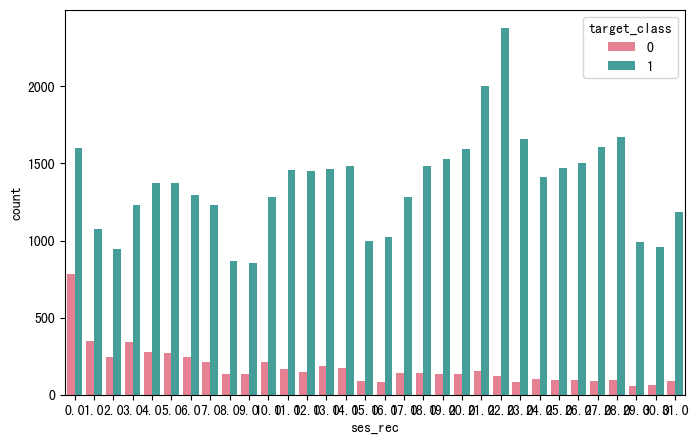

In [42]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x ='ses_rec', hue = "target_class", data = data, palette = 'husl')
plt.show()


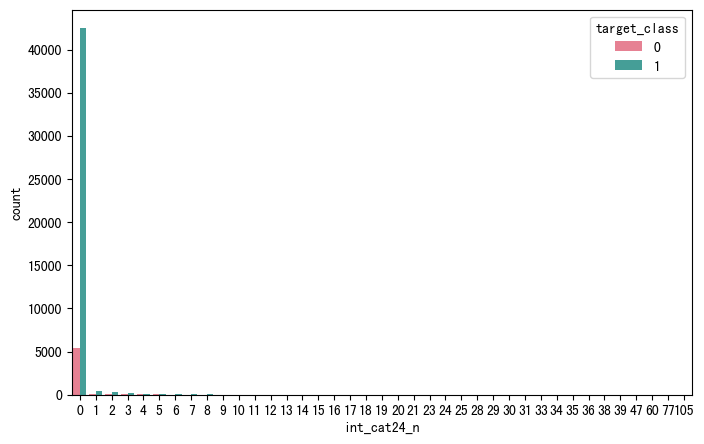

In [43]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x ='int_cat24_n', hue = "target_class", data = data, palette = 'husl')
plt.show()

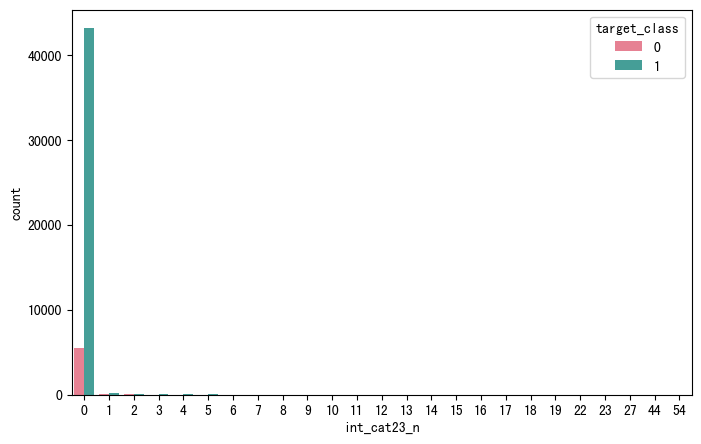

In [44]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x ='int_cat23_n', hue = "target_class", data = data, palette = 'husl')
plt.show()


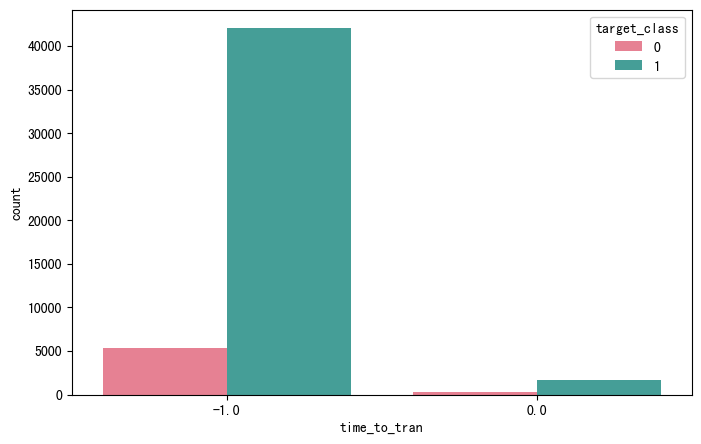

In [45]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x ='time_to_tran', hue = "target_class", data = data, palette = 'husl')
plt.show()

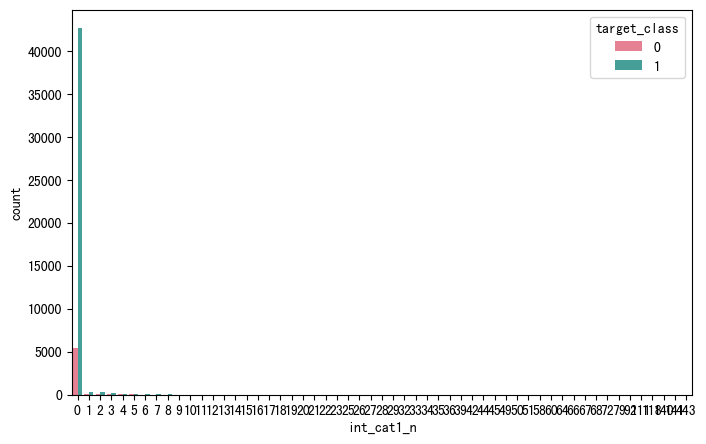

In [47]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x ='int_cat1_n', hue = "target_class", data = data, palette = 'husl')
plt.show()


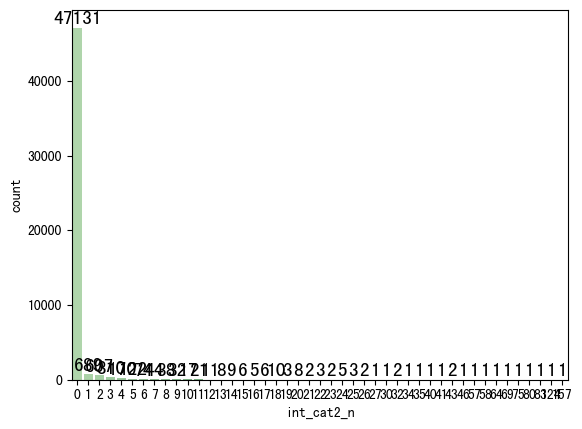

In [48]:
sns.countplot(x="int_cat2_n", data=data, palette="Greens_d")
family_members_count = df['int_cat2_n'].apply(int).value_counts().sort_index()
for a,b in zip(range(len(family_members_count)), family_members_count):
    plt.text(a, b+50, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

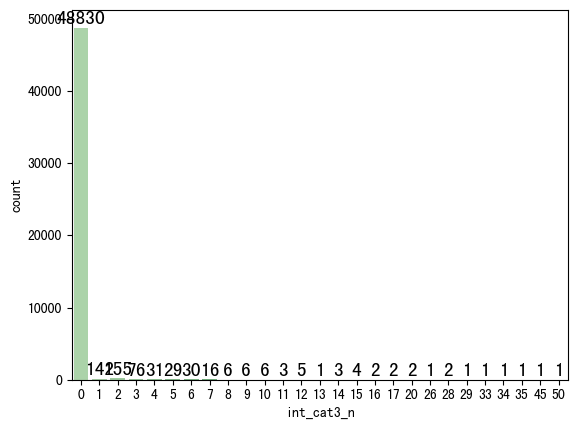

In [49]:
sns.countplot(x="int_cat3_n", data=data, palette="Greens_d")
family_members_count = df['int_cat3_n'].apply(int).value_counts().sort_index()
for a,b in zip(range(len(family_members_count)), family_members_count):
    plt.text(a, b+50, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.show()

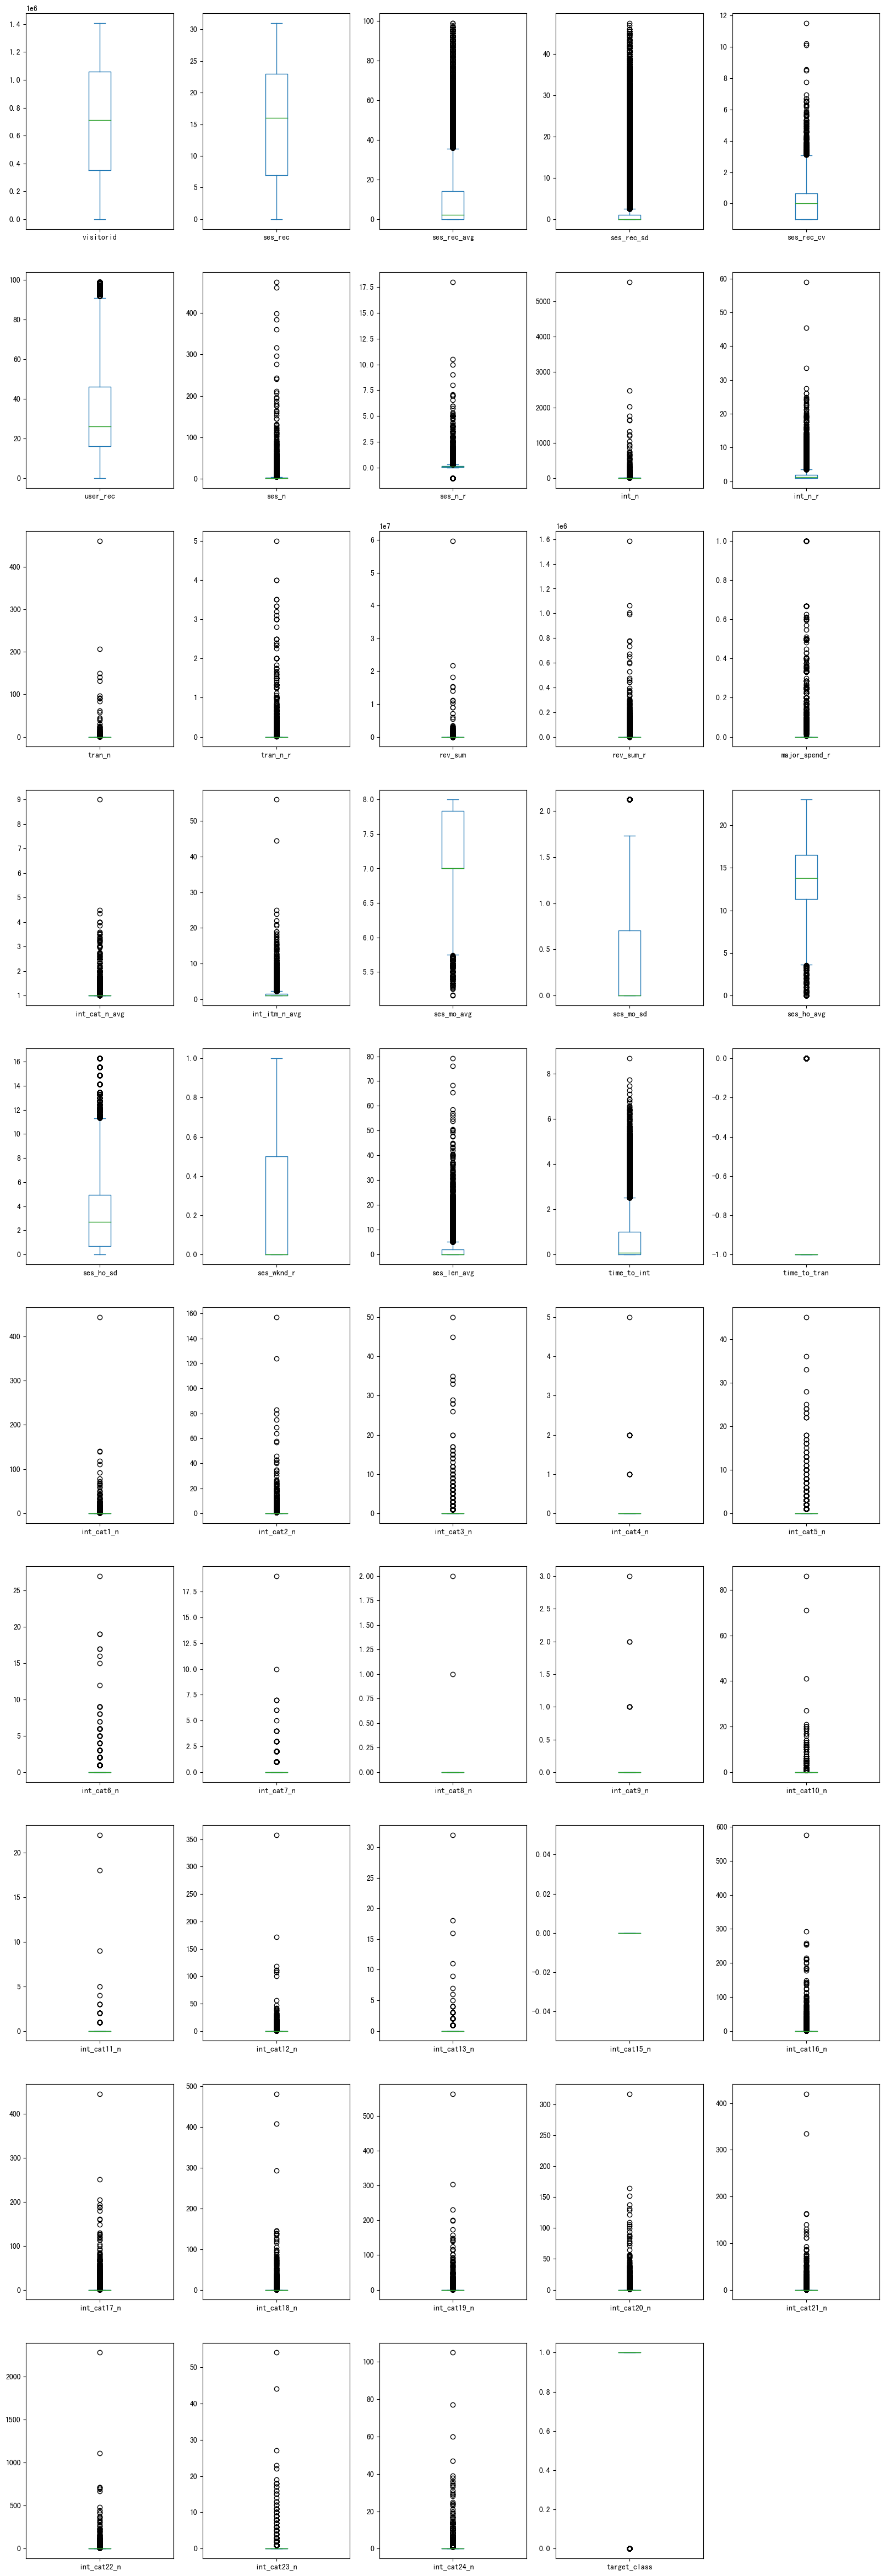

In [53]:
# Show horizontal box plots of each column in the dataframe
data.plot(kind='box', subplots=True, layout=(10,5), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

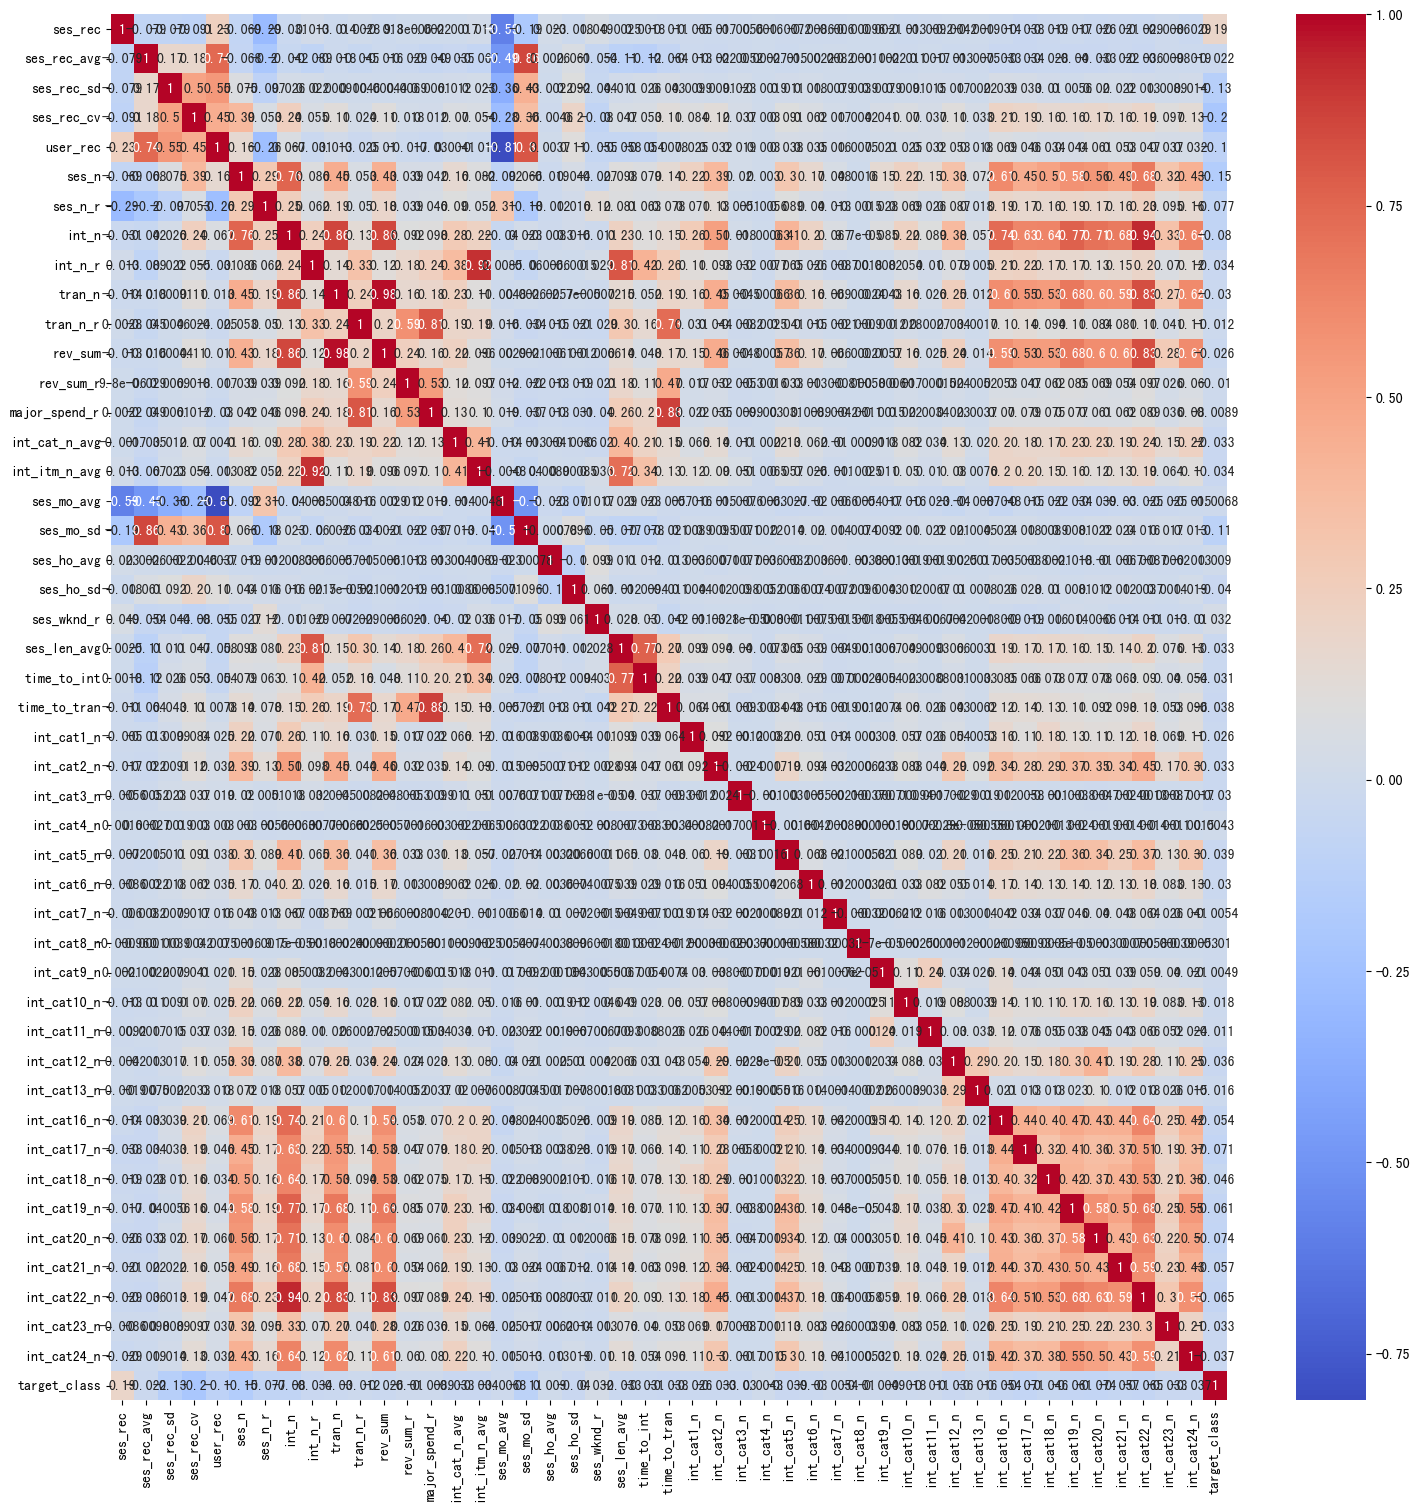

In [58]:
plt.figure(figsize=(18,18))
sns.heatmap(data.drop(['visitorid' , 'int_cat15_n' ], axis=1).corr() ,annot=True,cmap='coolwarm')
plt.show()

# 6 数据挖掘模型算法
    KNeighborsClassifier
    LinearSVC

In [57]:
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#导入模型评估相关包
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics

<AxesSubplot:>

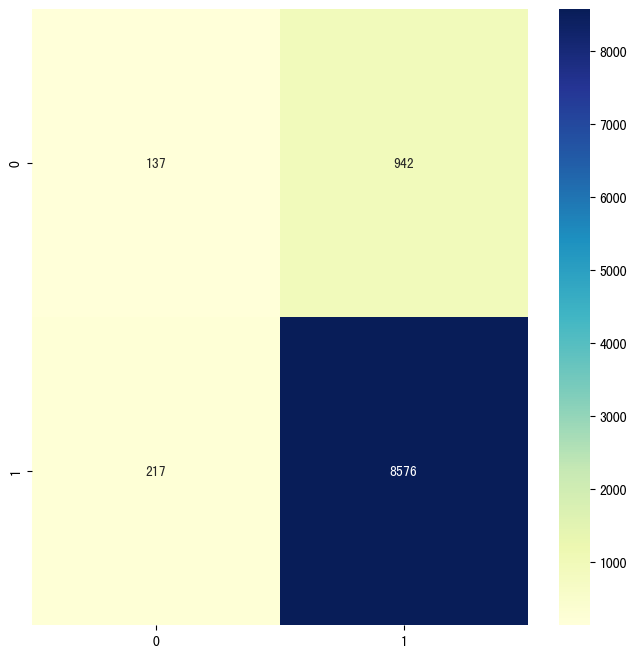

In [59]:
#训练集建模测试集模型评分、制作混淆矩阵 参数调优
log_reg = KNeighborsClassifier( )
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_val)
accuracy_score(y_val, y_pred)

cm = metrics.confusion_matrix(y_val, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True,fmt='g',cmap="YlGnBu")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


<AxesSubplot:>

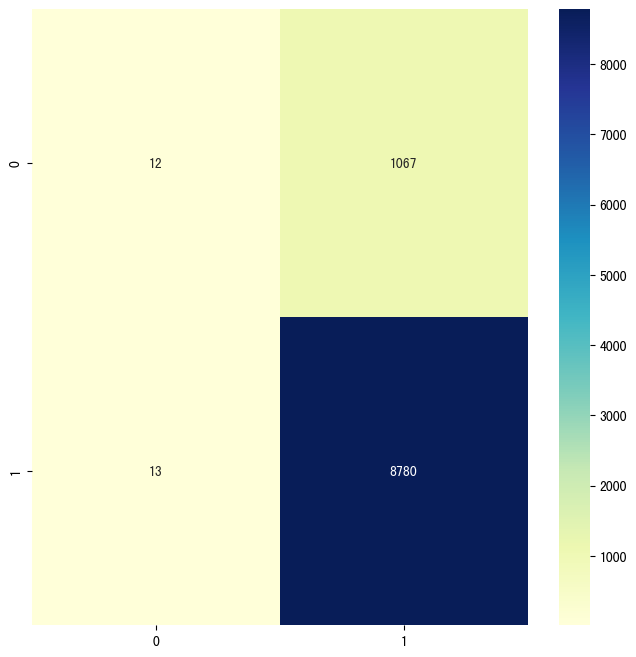

In [61]:
#训练集建模测试集模型评分、制作混淆矩阵 参数调优
R = LinearSVC( )
R.fit(X_train,y_train)
y_pred = R.predict(X_val)
accuracy_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True,fmt='g',cmap="YlGnBu")
